<a href="https://colab.research.google.com/github/sunkuvignesh21/AIML-PROJECT-2320040073/blob/main/AIML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv("/content/Language Detection(Kaggle).csv", encoding='latin-1')
data.head(10341)

,Text,Language,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,"Nature, in the broadest sense, is the natural...",English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""Nature"" can refer to the phenomena of the phy...",English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"The study of nature is a large, if not the onl...",English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Although humans are part of nature, human acti...",English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[1] The word nature is borrowed from the Old F...,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,à²¨à²¾à²°à³à²¸à²¿à²¸à²¾ à²¤à²¾à²¨à³ à²®à³à²...,Kannada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10335,à²¹à³à²à³ ' à²¨à²¾à²°à³à²¸à²¿à²¸à²¿à²¸à²®à...,Kannada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10336,à² à²µà²³à³ à²à² à²¹à³à²à³à²à³ à²à²¿à...,Kannada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10337,à²à³à²°à³à²°à²¿ à²¨à³à²µà³ à²¨à²¿à²à²µà²...,Kannada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data["Language"].value_counts()

,count
Language,
English,1385
French,1014
Spanish,820
Portugeese,739
Italian,698
Russian,692
Sweedish,676
Malayalam,594
Dutch,546


In [ ]:
X = data["Text"]
y = data["Language"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(10339, 23149)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict the target variable for the test data
y_pred = model.predict(x_test) # this line was missing

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9864603481624759


In [ ]:
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[ 97   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  63   0   3   0   0   0   0   0   0   0   0   0   0   3   0   0]
 [  0   0  93   0   1   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 291   1   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0 204   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  88   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0  77   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9   0   0   0   0   0   0   0   1   0]
 [  0   0   0   1   0   0   0   0 139   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  71   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0 127   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0 141   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0 160

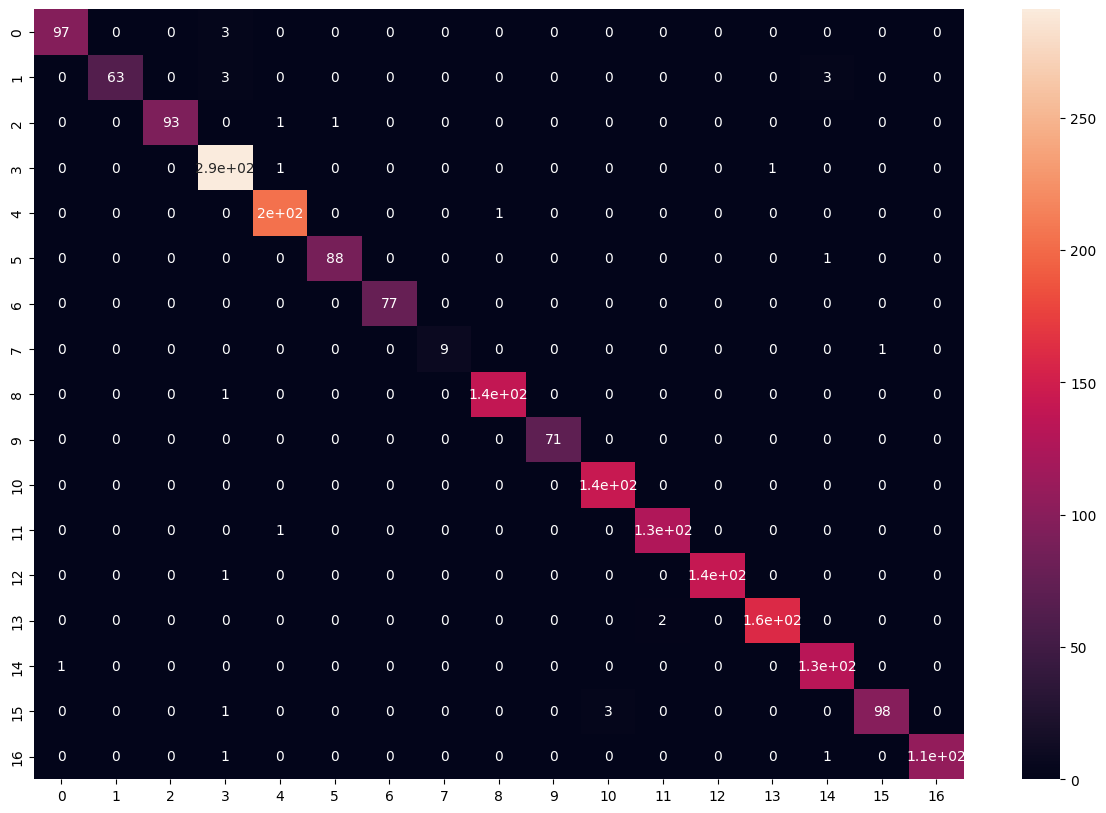

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [ ]:
predict('El nombre de mi equipo es KLV')

The langauge is in Spanish
